In [ ]:
# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Assemble url and make API request for each city
    city_url = url + "&q=" + city.replace(' ','+')

    # Extract results
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    try:
        city_weather = requests.get(city_url).json()
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
            
print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | san patricio
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | amahai
Processing Record 8 of Set 1 | tabou
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | kaitangata
Processing Record 12 of Set 1 | xacmaz
Processing Record 13 of Set 1 | nikolskoye
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 16 of Set 1 | tuktoyaktuk
Processing Record 17 of Set 1 | mogadishu
Processing Record 18 of Set 1 | ahipara
Processing Record 19 of Set 1 | portland
Processing Record 20 of Set 1 | barrow
Processing Record 21 of Set 1 | castro
Processing Record 22 of Set 1 | davidson
Processing Re

Processing Record 37 of Set 4 | moyale
Processing Record 38 of Set 4 | qaanaaq
Processing Record 39 of Set 4 | tezu
Processing Record 40 of Set 4 | senovo
Processing Record 41 of Set 4 | lokhvytsya
Processing Record 42 of Set 4 | vila velha
Processing Record 43 of Set 4 | torbay
Processing Record 44 of Set 4 | saint-philippe
Processing Record 45 of Set 4 | gogrial
City not found. Skipping...
Processing Record 46 of Set 4 | gushikawa
Processing Record 47 of Set 4 | rawannawi
City not found. Skipping...
Processing Record 48 of Set 4 | altay
Processing Record 49 of Set 4 | teluk nibung
City not found. Skipping...
Processing Record 0 of Set 5 | akropong
Processing Record 1 of Set 5 | iqaluit
Processing Record 2 of Set 5 | kavieng
Processing Record 3 of Set 5 | ripoll
Processing Record 4 of Set 5 | zabol
Processing Record 5 of Set 5 | ko samui
Processing Record 6 of Set 5 | gisborne
Processing Record 7 of Set 5 | sao filipe
Processing Record 8 of Set 5 | port hedland
Processing Record 9 of 

Processing Record 17 of Set 8 | genhe
Processing Record 18 of Set 8 | san luis
Processing Record 19 of Set 8 | manta
Processing Record 20 of Set 8 | adrar
Processing Record 21 of Set 8 | flinders
Processing Record 22 of Set 8 | mattru
Processing Record 23 of Set 8 | la libertad
Processing Record 24 of Set 8 | villarrica
Processing Record 25 of Set 8 | biak
Processing Record 26 of Set 8 | coihaique
Processing Record 27 of Set 8 | safaga
City not found. Skipping...
Processing Record 28 of Set 8 | zinder
Processing Record 29 of Set 8 | arona
Processing Record 30 of Set 8 | ruwi
Processing Record 31 of Set 8 | layou
City not found. Skipping...
Processing Record 32 of Set 8 | huilong
Processing Record 33 of Set 8 | coquimbo
Processing Record 34 of Set 8 | umm durman
City not found. Skipping...
Processing Record 35 of Set 8 | sundsvall
Processing Record 36 of Set 8 | gat
Processing Record 37 of Set 8 | hambantota
Processing Record 38 of Set 8 | nouadhibou
Processing Record 39 of Set 8 | bar 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Convert array of JSON into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="Index")

# Show Record Count
city_data_pd.count()

City          552
Cloudiness    552
Country       552
Date          552
Humidity      552
Lat           552
Lng           552
Max Temp      552
Wind Speed    552
dtype: int64

In [5]:
# Display the City Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,busselton,0,AU,1551647111,42,-33.64,115.35,64.99,19.95
1,yellowknife,20,CA,1551647086,42,62.45,-114.38,10.00,4.70
2,cape town,0,ZA,1551647176,93,-33.93,18.42,68.00,4.70
3,albany,75,US,1551647225,44,42.65,-73.75,39.99,4.70
4,san patricio,0,PY,1551647029,54,-26.98,-56.83,89.86,2.51


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [6]:
# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temhttp://localhost:8888/notebooks/06_API_JSON/WeatherPy/WeatherPy.ipynb#Latitude-vs.-Temperature-Plotps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]
today = time.strftime("%x")

In [ ]:
#### Latitude vs. Temperature Plot

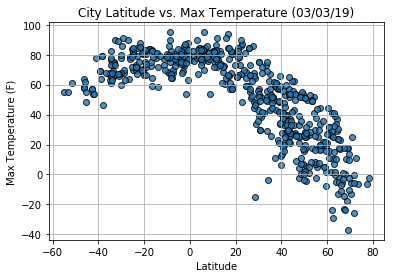

In [7]:
# Build scatter plot for latitude vs temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % today)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1_Lat_vs_Temp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

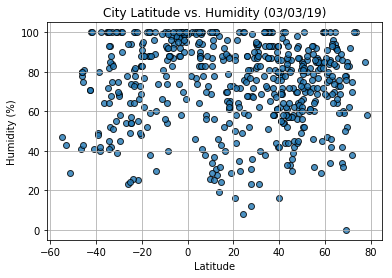

In [8]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % today)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2_Lat_vs_Humid.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

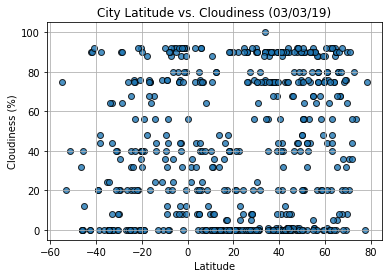

In [9]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % today)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3_Lat_vs_Cloud.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

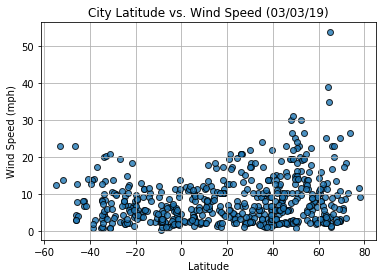

In [10]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % today)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4_Lat_vs_Wind.png")

# Show plot
plt.show()